# Quem é esse Pokémon? Uma análise sobre a franquia mais famosa de rinha de animais

### _Integrantes:_
- João Victor Azevedo Porto
- João Victor Rodrigues de Almeida Alves
- Lucas Nóbrega Albuquerque
- Samuel Pessoa de Castro

## _Introdução_

Em 28 de agosto de 1965, em Machida, na província de Tóquio, nasce Satoshi Tajiri, o homem que víria a criar uma franquia que marcaria gerações e moldaria a cultura pop de uma época. Nasce ali o criador de _Pocket Monsters_ (ポケットモンスター), também conhecido mundialmente como, simplesmente, Pokémon.

Na sua infância, Satoshi desenvolveu um hobby de colecionar insetos, procurando-os pelas florestas, campos e lagos. Por conta disso, era constantemente chamado de "Dr. Inseto" por seus amigos. Esse fascínio pelos bichos perdurou até o fim da década de 70, pois os lugares que Satoshi costumava visitar foram sendo, no decorrer dos anos, pavimentados e construídos apartamentos neles. Apartir dali, Tajiri desenvolveria uma nova paixão: videogames.

Já na adolescência, Satoshi gostava de passar a maior parte de seu tempo nos arcades. Em 1981, ganhou um concurso de _"Game design concept"_ produzido pela Sega. No ano seguinte, aos seus 16 anos de idade, se reuniu com seus amigos e decidiram criar uma revista focada em videogames, denominada de _Game Freak_. Com o passar da década, Tajiri foi aprimorando seu conhecimento sobre jogos e ficou mais interessado ainda na criação deles. No fim dos anos 80, mais especificamente em 1989, Satoshi e seus amigos fundaram, oficialmente, a empresa _Game Freak_ como desenvolvedora de jogos.

No início dos anos 90, Tajiri conheceu o _Game Boy_, um console portátil desenvolvido pela _Nintendo_. Uma peculiaridade do _Game Boy_ era um acessório que o acompanhava, o Cabo Link, na qual permitia conectar dois consoles para jogos multijogadores. Ao tomar conhecimento desse item, Satoshi imaginou insetos sendo transferidos de um console a outro. Lembrando de seu hobby de infância, uma ideia surgiu em sua imaginação. Um jogo de capturar e colecionar monstrinhos. Assim, surge a ideia do jogo Pokémon. Satoshi queria dá as crianças da época a mesma sensação que ele tinha quando mais novo. Tendo apresentado sua ideia à _Nintendo_, Tahiri trabalhou por 6 longos anos no desenvolvimento de sua ideia. Durante esse tempo, conheceu Shigeru Miyamoto, criador de Super Mario, na qual foi seu mentor e o ajudou nas primeiras versões do jogo. Por fim, em 26 de fevereiro de 1996, é lançado o primeiro jogo da franquia Pokémon: Red & Green.

O seu lançamento foi um sucesso imediato, sendo adaptado para várias mídias diferentes. Em outubro do mesmo ano foi lançado o _Pokémon Trading Card Game_, um jogo de cartas colecionáveis. Um pouco mais tarde, em abril de 1997, Pokémon recebeu sua primeira adaptação para _anime_ no Japão. O anime foi muito bem recebido pelo público infanto-juvenil, tanto que em junho de 1998 foi lançado o primeiro filme Pokémon nos cinemas nipônicos. Por conta do tremendo sucesso da franquia, a _Nintendo_ decidiu expandir a experiência para o ocidente, e assim, no ano de 1998, foi lançado a versão global do jogo: Pokémon Red & Blue e também o _anime_ tanto para a América quanto para a Europa. Dessa maneira, Pokémon foi apresentado ao mundo e logo se tornou uma febre internacional.

Até os dias de hoje, quase 30 anos desde o seu primeiro lançamento, _Pocket Monster_ é um sucesso mundial. Possuindo mais de 20 jogos, entre principal e spin-offs, mais de 1300 episódios em anime e bilhares de cartas produzidas, Pokémon continua cativando o seu público já estabelecido e atraindo cada vez mais novas pessoas, incluindo a nós, integrantes deste projeto.

Partilhando do mesmo interesse, vimos a oportunidade de trabalhar com algo que gostamos, visando analisar os ramos mais importantes da franquia e, principalmente, sobre os próprios monstrinhos Pokémons.

## Dados Utilizados

Nesta seção mostraremos e explicaremos os datasets escolhidos. Para tal, começaremos importando a biblioteca Pandas.

In [27]:
import pandas as pd

In [28]:
### Fazer aqui sobre os consoles/videogames

### _Animes_

In [29]:
# Dataset original
df = pd.read_csv(r"C:\Users\jaozi\Downloads\Datasets-Pokemon\anime.csv")

In [30]:
len(df)

24985

In [31]:
# Colunas do dataset
df.columns

Index(['anime_id', 'title', 'type', 'score', 'scored_by', 'status', 'episodes',
       'start_date', 'end_date', 'source', 'members', 'favorites',
       'episode_duration', 'total_duration', 'rating', 'sfw', 'approved',
       'created_at', 'updated_at', 'start_year', 'start_season',
       'real_start_date', 'real_end_date', 'broadcast_day', 'broadcast_time',
       'genres', 'themes', 'demographics', 'studios', 'producers', 'licensors',
       'synopsis', 'background', 'main_picture', 'url', 'trailer_url',
       'title_english', 'title_japanese', 'title_synonyms'],
      dtype='object')

In [32]:
# Verificando os tipos de cada coluna
df.dtypes

anime_id              int64
title                object
type                 object
score               float64
scored_by             int64
status               object
episodes            float64
start_date           object
end_date             object
source               object
members               int64
favorites             int64
episode_duration     object
total_duration       object
rating               object
sfw                    bool
approved               bool
created_at           object
updated_at           object
start_year          float64
start_season         object
real_start_date      object
real_end_date        object
broadcast_day        object
broadcast_time       object
genres               object
themes               object
demographics         object
studios              object
producers            object
licensors            object
synopsis             object
background           object
main_picture         object
url                  object
trailer_url         

O dataset sobre os animes se baseia no site My Anime List, que é um dos maiores sites sobre animações japonesas do mundo. Tendo dados até a metade de 2023, o dataset possui 39 colunas e mais de 24 mil linhas sobre as mais diversas animações já lançadas.

Nele temos, majoritariamente, dados do tipo categórico (object), que detalham algo acerca do anime. Todavia, possuimos também alguns dados do tipo quantitativo (int e float), que serão primordias para nos ajudar à responder as perguntas. Podemos ver também alguns dados do tipo booleano, mas que não serão utilizados.

Entretanto, este é um dataset muito extenso e iremos precisar encurta-lo para usar somente o necessário.

In [33]:
### Fazer aqui sobre os Pokémons

### _Pokémons favoritos_

In [54]:
# dataset original
favs = pd.read_csv(r"C:\Users\jaozi\Downloads\Datasets-Pokemon\Favourite Pokémon responses - Results.csv")

In [55]:
len(favs)

809

In [57]:
favs.columns

Index(['Pokemon', 'Votos', 'Tipo', 'Geracao', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Select a Pokémon here to see how many votes it got',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Top', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Number of pokemon by number of votes', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'By type', 'Psychic', 'Unnamed: 23', 'By Gen', '5'],
      dtype='object')

In [60]:
favs.dtypes

Pokemon                                                object
Votos                                                   int64
Tipo                                                   object
Geracao                                                 int64
Unnamed: 4                                             object
Unnamed: 5                                            float64
Unnamed: 6                                             object
Select a Pokémon here to see how many votes it got     object
Unnamed: 8                                             object
Unnamed: 9                                             object
Unnamed: 10                                           float64
Unnamed: 11                                            object
Unnamed: 12                                            object
Top                                                    object
Unnamed: 14                                            object
Unnamed: 15                                            object
Unnamed:

In [64]:
favs['Votos'].sum()

52725

O dataset sobre os Pokémons favoritos da comunidade foi feito através de uma pesquisa na rede social reddit, dentro do sub r/pokemon. Foram 52725 votos entre 800 diferentes pokémons, da primeira até a sétima geração. Como vemos acima, temos muitas colunas do tipo categórico e poucas do tipo numérico. Entretanto, o arquivo csv original foi feito de maneira incomum, o que dificulta à visualização e o entendimento dos dados no geral. Faremos alguns ajustes nele. 

## Pré-processamento dos Dados

In [34]:
### Fazer aqui sobre os consoles/videogames

### _Animes_

Como temos um dataset com uma quantidade absurda de animes desnecessários, vamos criar uma varíavel para armazenar somente aquelas animações que possuam a palavra "Pokemon" no título.

In [35]:
poke_animes = df[df['title'].str.contains('Pokemon')] # Filtando para somente os animes que tenha 'Pokemon' no título.

Temos agora um dataset com 124 linhas, ao invés de 24 mil. É notável que há tipos diferentes de animações, mas iremos trabalhar somente com os do tipo 'tv' e 'movie'. Portanto, vamos armazena-las em duas novas variáveis.

In [36]:
animes_tv = poke_animes[poke_animes['type'] == 'tv'] # Séries Animadas lançadas para Tv
animes_movies = poke_animes[poke_animes['type'] == 'movie'] # Filmes animados

O "animes_tv" já está todo em ordem e pronto para ser analisado. Porém, no "animes_movies" temos alguns títulos que não queremos utilizar. Então vamos reduzir os filmes para aqueles que contenham a palavra 'Movie' no título.

In [37]:
animes_movies = animes_movies[animes_movies['title'].str.contains('Movie')] # Filtrando para somente aqueles que contenham 'Movie' no título.

Pronto, agora estamos prontos para a análise.

In [38]:
### Fazer aqui o dos pokémons

### _Pokémons favoritos_

Como dito anteriormente, temos um embaralhamento confuso nesse dataset. Todavia, iremos utilizar somente as quatro primeiras colunas. Portanto, vamos filtrar o dataset para excluirmos as colunas desnecessárias.

In [63]:
favs = favs.filter(items=['Pokemon', 'Votos', 'Tipo', 'Geracao']) # filtrando para as colunas necessárias.
favs

,Pokemon,Votos,Tipo,Geracao
0,Bulbasaur,710,Grass Poison,1
1,Ivysaur,83,Grass Poison,1
2,Venusaur,127,Grass Poison,1
3,Charmander,374,Fire,1
4,Charmeleon,70,Fire,1
...,...,...,...,...
804,Stakataka,13,Rock Steel,7
805,Blacephalon,8,Fire Ghost,7
806,Zeraora,17,Electric,7
807,Meltan,3,Steel,7


Feito. Com isso, já podemos analisar e responder as perguntas.

## Perguntas

Nessa seção iremos responder as perguntas em que foram baseadas nosso projeto. Primeiro, vamos importar as bibliotecas necessárias.

In [128]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### _Medidas de Centralidade e Dispersão:_

Começamos criando funções para calcular as medidas de centralidade e dispersão de qualquer dataset.

In [130]:
def Media(data, column): # Calcular a média de qualquer coluna
    media = np.mean(data[column])
    print(f"Média: {media:.2f}")

def Mediana(data, column): # Calcular a mediana de qualquer coluna
    mediana = np.median(data[column])
    print(f"Mediana: {mediana:.2f}")

def Variancia(data, column): # Calcular a variância de qualquer coluna
    variancia = np.var(data[column])
    print(f"Variância: {variancia:.2f}")

def DesvioPadrao(data, column): # Calcular o desvio padrão de qualquer coluna
    desvio_padrao = np.std(data[column])
    print(f"Desvio Padrão: {desvio_padrao:.2f}")

def Correlacao(data, column1, column2): # Calcular a correlação entre duas colunas
    correlacao = data[column1].corr(data[column2])
    print(f"Correlação entre {column1} e {column2} é de: {correlacao:.2f}")

### _Qual a geração com o maior número de venda de jogos?_

### _Quais as temporadas e os filmes mais bem avaliados pelo público?_

Para responder à essa pergunta, primeiro vamos ver como se comporta o boxplot das animações.

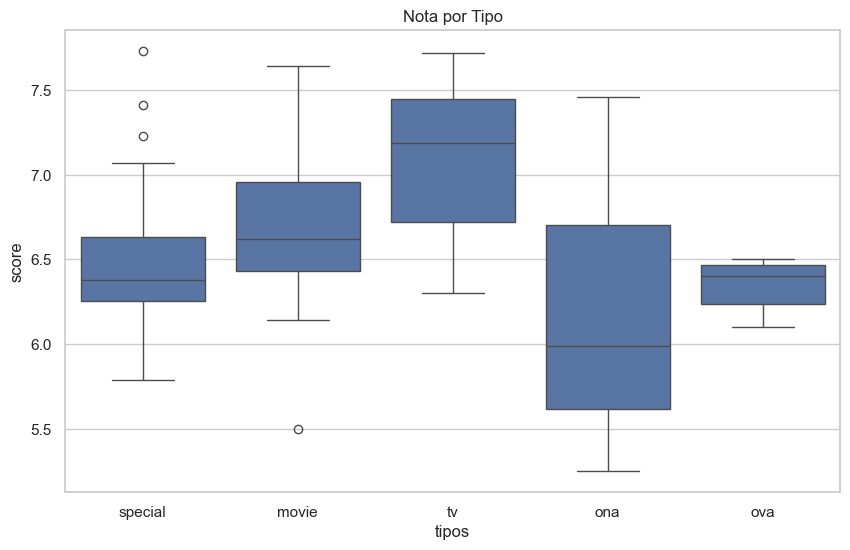

In [140]:
poke_animes = poke_animes[poke_animes['type'] != 'music'] # excluindo as animações do tipo 'música'

plt.figure(figsize=(10, 6)) # tamanho da figura
sns.boxplot(data=poke_animes, x='type', y='score') # função pra criar o boxplot
plt.title('Nota por Tipo') # título
plt.xlabel('tipos') # nome pro eixo x
plt.ylabel('score') # nome pro eixo y
plt.show() # mostrar gráfico

Para criar os boxplot, passamos o nosso dataset 'poke_animes' que contém todos tipos de animações, mas, antes, removemos a animação do tipo 'música', pois ela não é útil. Como eixo x utilizamos os tipos de animação e como eixo y as notas.

Olhando para o gráfico podemos ver 5 tipos diferente de animação. São eles:

- Special é um termo bem abrangente no meio dos animes, pois podem se referir à episódios de recapitulação da história, episódios contando uma história extra/especial entre uma temporada e outra ou podem, até mesmo, ser uma continuação direta da história principal. Tv Special é composta, normalmente, por apenas um episódio.

- Movie se refere à todos filmes da franquia. Ao todo foram 23 filmes lançados até o ano de 2020, sendo 20 deles histórias originais e 3 reboots.

- Tv são os animes lançados na Tv Japonesa. Contando tudo, são mais de 20 temporadas lançadas e mais de 1300 episódios. Sendo lançado desde 1997, cada temporada é uma reimaginação da história do jogo de mesmo nome.

- Ona (Original Web Animation) são episódios lançados diretamente na internet.

- Ova (Original Video Animation) são episódios lançados diretamente no dvd que não foram ao ar na televisão. Podem ser tanto adaptação do material original, quanto uma história original.

Entretanto, neste projeto iremos trabalhar apenas com as animações do tipo 'Tv' e 'Movie'.

Vamos analisar como estão distribuidas as notas dessas animações. Demonstraremos isso através do gráfico de sino.

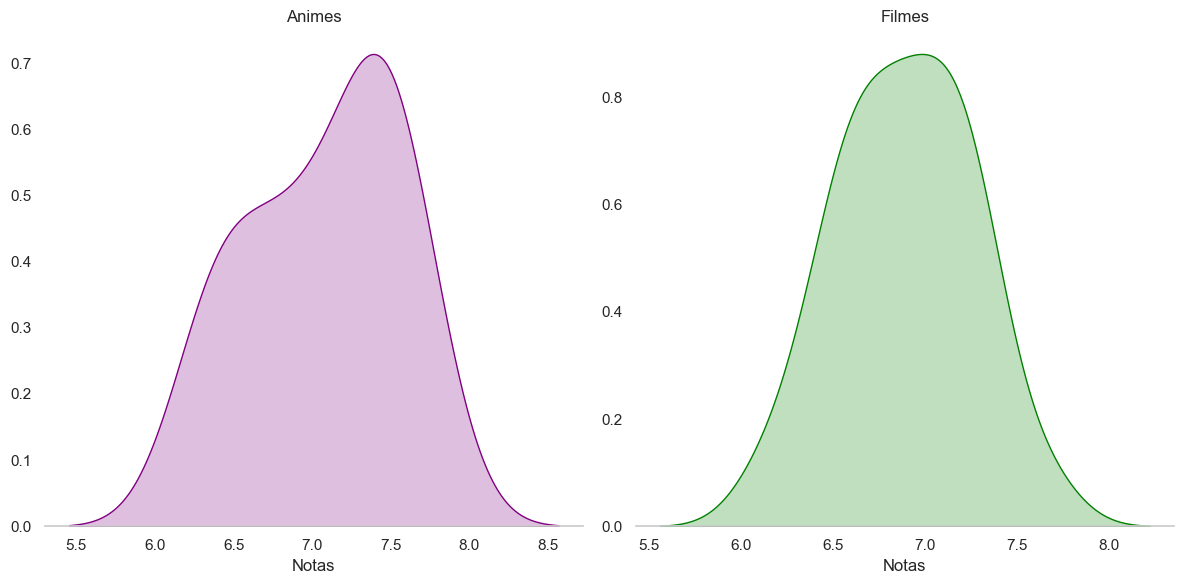

In [163]:
plt.figure(figsize=(12,6)) # Tamanho da figura

plt.subplot(1, 2, 1) # Criamos dois gráficos lado a lado. Esse é referente ao gráfico à esquerda.
sns.kdeplot(data=animes_tv, x='score', color='purple', fill=True) # função pra criar o gráfico de sino
plt.grid(False) # apagar as linhas do fundo
plt.title("Animes") # título
plt.xlabel("Notas") # nome para o eixo x
plt.ylabel('')

plt.subplot(1, 2, 2) # Esse é referente ao gráfico à direita.
sns.kdeplot(data=animes_movies, x='score', color='green', fill=True) # função pra criar o gráfico de sino
plt.grid(False) # apagar as linhas do fundo
plt.title("Filmes") # título
plt.xlabel("Notas") # nome para o eixo x
plt.ylabel('')

sns.despine(left=True) # apagar a linha lateral que fica à esquerda
plt.tight_layout() # ajustar a posição dos dois gráficos
plt.show() # mostrar gráficos

Para a função dos gráficos, passamos como parâmetros as variáveis referente às séries de tv animada e aos filmes, no primeiro e segundo gráfico, respectivamente. Além disso, usamos como eixo x a coluna 'score' em ambas e escolhemos a cor para cada um.

Analisando os gráficos de densidade, é possível notar que os filmes possuem uma concentração maior por volta da nota 7, enquanto os animes têm uma leve variação, tendo notas concentradas entre 6.5 e 7.5.

Isso fica ainda mais visível sobrepondo os dois gráficos

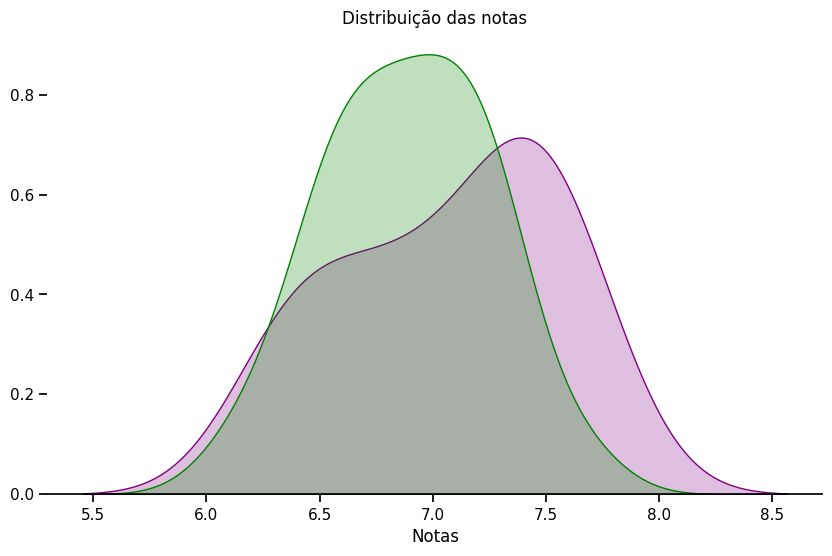

In [41]:
# Mesmo código, só que sem subplot. Apenas pra comparação.

sns.set(style=None)
plt.figure(figsize=(10,6))

sns.kdeplot(data=animes_tv, x='score', color='purple', label='Tv', fill=True)
sns.kdeplot(data=animes_movies, x='score', color='green', label='Filmes', fill=True)
plt.title("Distribuição das notas")
plt.xlabel("Notas")
plt.ylabel('')
sns.despine(left=True)
plt.show() 

Tendo noção de como estão distribuídas as notas de cada um, vamos agora avaliar o top 5 séries animadas e top 5 filmes mais bem avaliadas pela comunidade. Iremos fazer isso através do gráfico de barras. Primeiro, as séries animadas.

In [42]:
quantMinima = 50000 # quantidade mínimas de pessoas
top5 = animes_tv[animes_tv['scored_by'] >= quantMinima] # tabela filtrada

Se olharmos a tabela da variável "animes_tv", vemos que a coluna 'scored_by' possui uma discrepância muito grande, pois quanto maior a quantidade de pessoas, mais influência ocorrerá sobre o 'score'. Portanto, no código acima, estamos delimitando uma quantidade mínima de pessoas que tenham avaliado aquela temporada, que nesse caso será 50 mil pessoas. Tendo delimitado essa quantidade, criamos uma nova variável com a tabela filtrada para somente aquelas temporadas que foram avaliadas por, pelo menos, 50 mil pessoas.

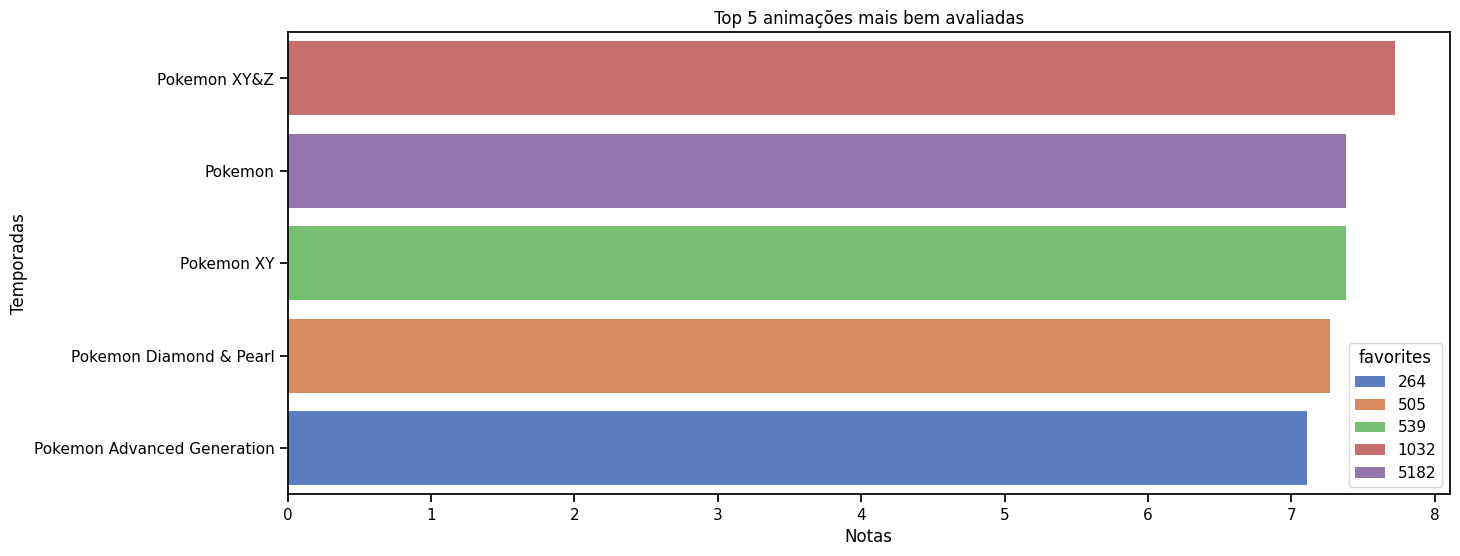

In [43]:
top5 = top5.sort_values(by='score', ascending=False) # Ordenando a tabela pela nota em ordem decrescente
plt.figure(figsize=(15, 6)) # tamanho do gráfico 
sns.barplot(data=top5[:5], x='score', y='title', hue='favorites', palette='muted') # função para criar o gráfico de barra
plt.title("Top 5 animações mais bem avaliadas") # título
plt.xlabel("Notas") # nome para o eixo x
plt.ylabel("Temporadas") # nome para o eixo y
plt.show() # mostra gráfico

Para a montagem do nosso gráfico, usamos como parâmetro a nova variável utilizada para as temporadas que atingiram a quantidade mínima de votantes, porém, somente os 5 primeiros índices (linhas). Em seguida, usamos como eixo x as notas ('score') e no eixo y os títulos ('title'). Foi escolhido o gráfico de barras horizontal porque fica mais fácil de visualizar a qual temporada cada barra se refere. Ademais, passsamos como parâmetro "hue" a coluna de favoritos ('favorites'), que se refere à quantas pessoas favoritaram tal temporada.

Analisando o gráfico, temos como primeiro colocado:

    A temporada "Pokemon XY&Z", que refere-se à terceira temporada da saga "Pokémon XY", lançada em 2015 e adaptando a sexta geração da franquia. XY&Z ficou em primeiro lugar com uma nota de 7.72 e tendo sido favoritado por 1032 pessoas.

Em segundo colocado:
    
    A primeira temporada da franquia, onde tudo começa, Pokémon!, lançada em 1997 e adaptando a primeira e segunda geração dos jogos para console. Pokémon ficou em segundo lugar com uma nota de 7.38 e tendo sido favoritado por 5182 pessoas! 

Em terceiro colocado: 

    A primeira temporada da saga "XY", Pokémon XY!, lançada em 2013 e adaptando, também, a sexta geração da franquia. Junto com o segundo colocado, XY obteve 7.38 de nota e foi favoritado por 539 pessoas.

Em quarto colocado:

    Temos a saga Pokémon Diamond & Pearl!, lançada em 2006 e adaptando a quarta geração da franquia. Diamond & Pearl obteve uma nota geral de 7.27 e foi favoritado por 505 pessoas.

Em quinto colocado:

    Pokémon Advanced Generation!, lançada em 2002 e adaptando a terceira geração de Franquia, "Ruby and Sapphire". Advanced Generation obteve uma nota de 7.11 e foi favoritado por 264 pessoas.

Olhando pro resultado, podemos afirmar que o público gosta bastante das primeiras gerações animadas, pois temos a primeira, segunda, terceira e quarta geração dentro do top 5. Também podemos dizer que a saga XY agrada à muitos.

Agora vamos analisar o top 5 dos filmes.

In [44]:
animes_movies['title'] = animes_movies['title_english'] # troca o nome do título em romanji para o título em inglês
quantmin = 50000
top_movies = animes_movies[animes_movies['scored_by'] >= quantmin]

Na primeira linha de código, fizemos uma troca de título para ficar melhor de visualizar. Trocamos o título original em _romanji_ pelo título oficial em inglês. De resto, aplicamos o mesmo método da quantidade mínima de votantes, 50 mil, para o top 5 dos filmes.

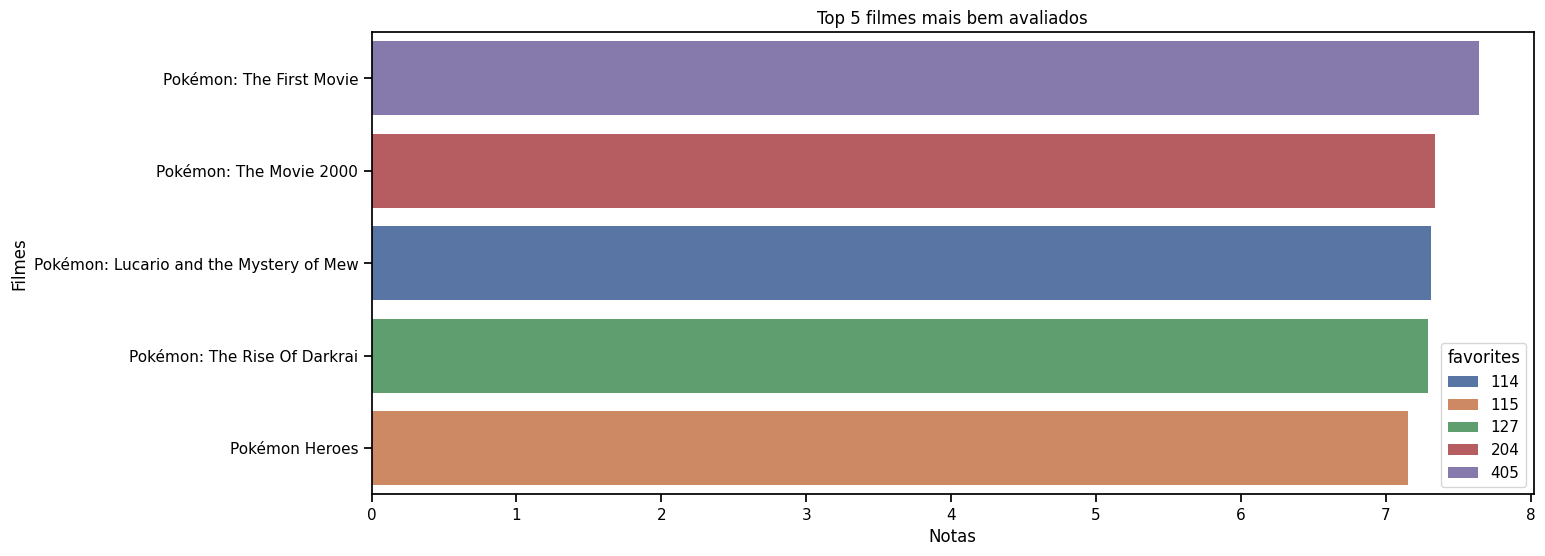

In [45]:
top_movies = top_movies.sort_values(by='score', ascending=False) # ordenando por nota em ordem decrescente
plt.figure(figsize=(15, 6)) # tamanho da figura
sns.barplot(data=top_movies[:5], x='score', y='title', hue='favorites', palette='deep') # função pra criar o gráfico
plt.title("Top 5 filmes mais bem avaliados") # título
plt.xlabel("Notas") # nome pro eixo x
plt.ylabel("Filmes") # nome pro eixo y
plt.show() # mostrar gráfico

Utilizando a mesma ideia que o gráfico anterior, fizemos um top 5 filmes na qual passamos como parâmetro: a variável armazenando os filmes que foram avaliados por, pelo menos 50 mil pessoas, notas como eixo x e título do filme como eixo y, para melhor visualização e também passamos os favoritos como "hue".

Analisando o gráfico temos como primeiro colocado:

    Pokémon: The first Movie!. O primeiro filme da franquia, lançado no ano de 1998 nele somos apresentados ao primeiro pokémon lendário da franquia, o Mewtwo. The first movie obteve uma nota de 7.64 e foi favoritado por 405 pessoas.

Em segundo colocado:

    Pokémon: The movie 2000. Lançado em 1999, é o segundo filme da franquia. Nele somos apresentado ao segundo pokémon lendário, Lugia. O filme recebeu uma nota de 7.34 e foi favoritado por 204 pessoas.

Em terceiro colocado:

    Pokémon: Lucário and the Mystery of Mew. Lançado em 2005, é o oitavo filme da franquia e também o primeiro a não ter uma história centrada em um pokémon lendário. Esse filme obteve uma nota de 7.31 e foi favoritado por 114 pessoas.

Em quarto colocado:

    Pokémon: The Rise of Darkrai. O décimo filme da franquia, lançado no ano de 2007. É o filme que marcou por ter alcançado 50 bilhões de ienes em bilheteria, somando todas bilheterias anteriores. Nele somos apresentados ao lendário, Darkrai. O filme recebeu uma nota de 7.29 e foi favoritado por 127 pessoas.

Em quinto colocado:

    Pokémon Heroes. lançado em 2002, é o quinto filme da franquia. Nele somos apresentados ao pokémon lendário Latios. Pokémon Heroes obteve uma nota de 7.15 e foi favoritado por 204 pessoas.

Avaliando os resultados, temos o primeiro filme como o favorito de boa parte da comunidade. Ademais, podemos dizer que os 10 primeiros filmes foram até que muito bem recebido pelo público, pois todos obtiveram nota 7 ou próximo.

Isso fica muito mais óbvio analisando à bilheteria de cada filme.

In [46]:
poke_movies = animes_movies.filter(items=['title', 'score', 'favorites', 'start_year']) # filtra a tabela

In [47]:
poke_movies = poke_movies.sort_values(by='start_year', ascending=True) # ordena a tabela

Nos dois códigos acima, criamos uma nova variável para armazenar somente certas colunas referente aos filmes de Pokémon. Essas colunas foram: O título, a nota, a quantidade de favoritos e o ano lançado. Em seguida, ordenamos essa nova varíavel através da coluna 'start_year' em ordem crescente.

In [48]:
box_office = [7.6, 6.4, 6.4, 3.9, 2.67, 4.5, 4.38, 4.3, 3.4, 5.02, 4.8, 4.67, 4.16, 4.33,
              4.33, 3.61, 3.17, 2.91, 2.61, 2.15, 3.55, 3.09, 2.98, 2.02] # Bilheteria de cada filme

indice = [643, 1268, 2029, 2536, 2034, 3266, 2549, 1582, 3223, 1640, 2888, 2570, 3087, 4046,
         4262, 4776, 5284, 4750, 4261, 4452, 2539, 2769, 6590, 2987] # Indice das linhas

for i in range(len(box_office)): # Função pra adicionar a bilheteria pra cada filme correspondente
    filme = indice[i]
    bilheteria = box_office[i]
    poke_movies.loc[filme, 'gross'] = bilheteria

Agora criamos duas listas, uma chamada 'box_office' que contém números floats que representam a bilheteria de cada filme e uma chamada 'indice' que refere-se à linha de cada filme na variável "poke_movies". Em seguida aplicamos um loop para criar-se uma nova coluna na tabela chamada de 'gross' e para adicionar a bilheteria de cada filme correspondente.

Agora vamos demonstrar como foi a bilheteria dos filmes no cinemas japoneses com o passar dos anos.

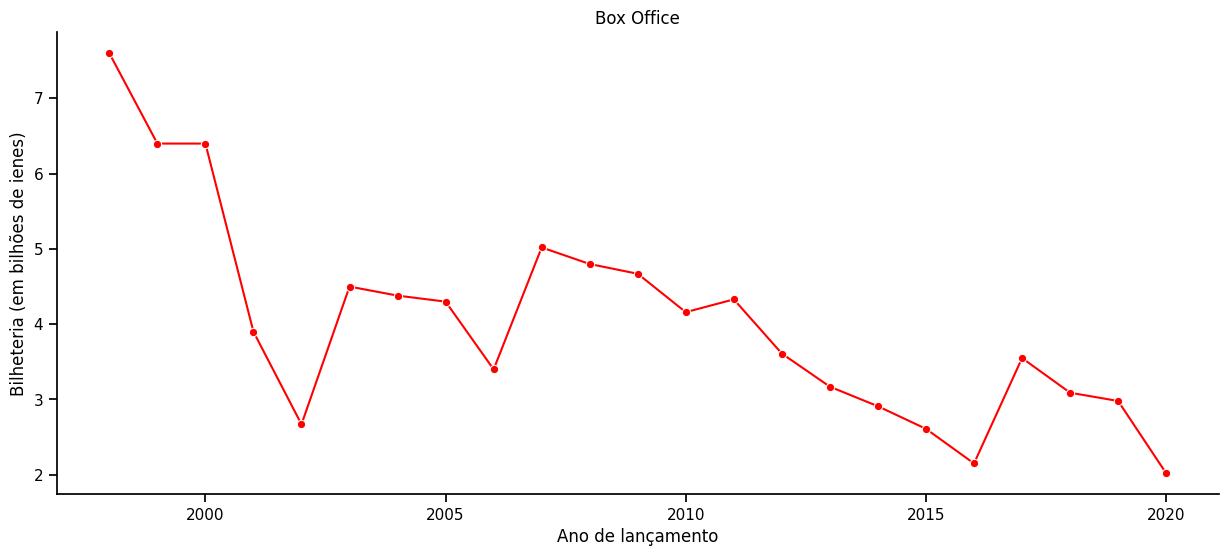

In [49]:
plt.figure(figsize=(15, 6)) # tamanho da figura
sns.lineplot(data=poke_movies, x='start_year', y='gross', marker='o', color='red') # função pra criar o gráfico do lineplot
sns.despine() # remover as linhas do limite superior e à direita
plt.title("Box Office") # título
plt.xlabel("Ano de lançamento") # nome pro eixo x
plt.ylabel("Bilheteria (em bilhões de ienes)") # nome pro eixo y
plt.show() # mostrar gráfico

Para criar o gráfico de linha usamos a nova variável criada como o data, além disso, declaramos a coluna 'start_year' como o eixo x e a nova coluna criada, 'gross', como eixo y. Ademais, também foi acrescentado o marker 'o' para representar cada filme.

Analisando o gráfico, vemos que o pico de bilheteria foi no primeiro filme, lançado no ano de 1998, com mais de 7 bilhões de Ienes arrecadados. Após isso, podemos notar que, com o decorrer dos anos, o Box Office dos filmes forem decaindo chegando até 2 bilhões de Ienes, no último filme lançado em 2020, Pokémon: Secret of The Jungle. Entretanto, como podemos dizer quais filmes renderam bem? Pra isso, vamos passar uma reta no gráfico representando a média de bilheteria.

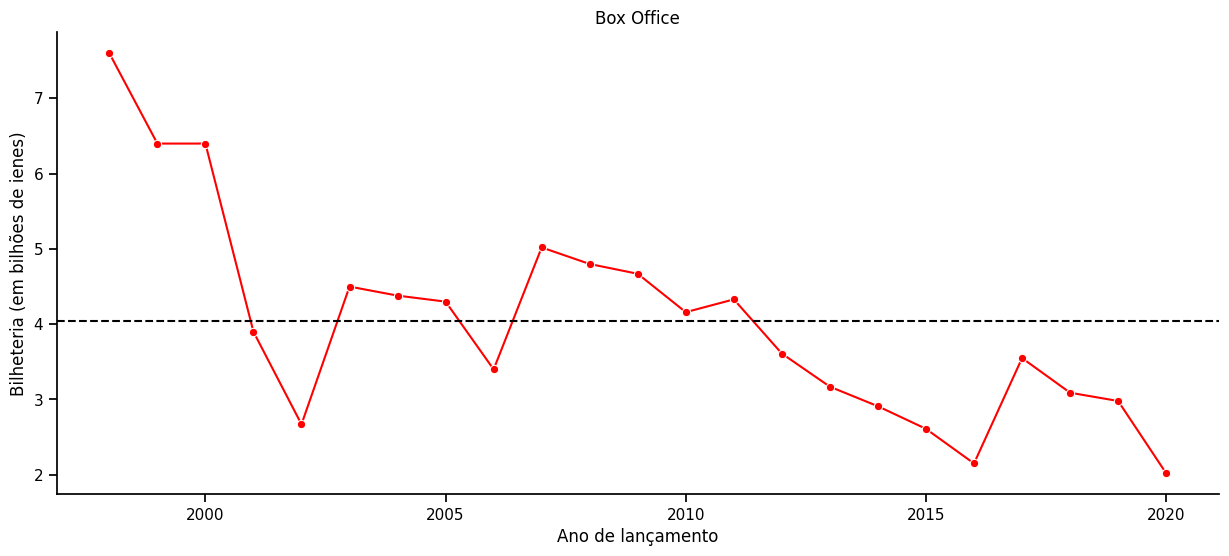

In [50]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=poke_movies, x='start_year', y='gross', marker='o', color='red')
sns.despine()
plt.axhline(y=poke_movies['gross'].mean(), color='black', linestyle='--', label=f'Média Geral de Bilheteria') # Adicionado linha representando a média
plt.title("Box Office")
plt.xlabel("Ano de lançamento")
plt.ylabel("Bilheteria (em bilhões de ienes)")
plt.show()

Com uma média de mais ou menos 4 bilhões de ienes, temos uma reta traçejada. Avaliando por ela, podemos enxergar que uma boa quantidade de filmes estão acima da média, incluindo 7 dos 10 primeiros filmes lançados. Podemos dizer, também, que a maior queda de bilheteria foi entre o terceiro e o quarto filme.

Mas, a próposito, existe alguma correlação entre a nota do público e a bilheteria japonesa arrecadada?

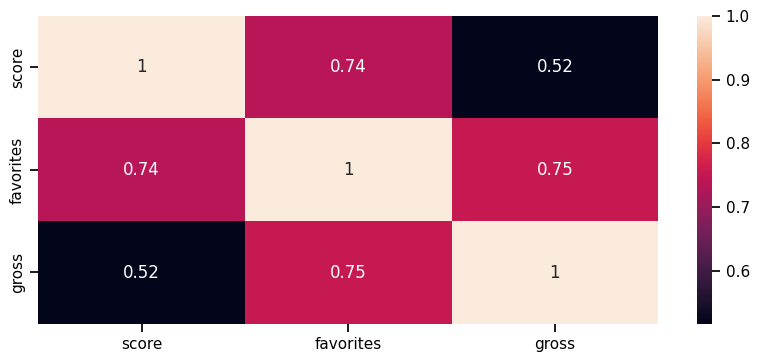

In [51]:
scr_grs = poke_movies[['score', 'favorites', 'gross']] # armazenando as colunas a serem utilizadas
data_corr = scr_grs.corr() # fazendo a correlação entre cada coluna
plt.figure(figsize=(10, 4)) # tamanho da figura
sns.heatmap(data_corr, annot=True) # função pra criar o heatmap
plt.show() # mostra gráfico

Criamos uma nova variável que receberá apenas as colunas de favoritos, score e gross do gráfico anterior. Com isso, chamamos a função '.corr()' pra fazer a correlação das colunas entre si e salvando-as numa nova variável. Por fim, criamos um gráfico de calor para demonstrar essa correlação.

Podemos enxergar, claramente, que há uma forte correlação entre as notas dos filmes ('score') e a quantidade de favoritos ('favorites') e também entre favoritos e a bilheteria ('gross'). Já entre as notas e a bilheteria temos uma correlação mediana, de 0.52, o que diz que a bilheteria arrecadada acaba não influênciando muito nas notas da comunidade global.

In [62]:
### Fazer o dos pokémons status aqui

### _Quais são os pokémons favoritos da comunidade?_

Primeiro, vamos mostrar quantos votos tivemos por geração. Como dito antes, foram mais de 50 mil votos válidos entre 7 gerações de Pokémons.

In [67]:
votos_geracao = favs.groupby('Geracao')['Votos'].sum() # agrupando os pokémons de todas gerações e somando o voto de cada
votos_geracao

Geracao
1    18289
2     9115
3     9469
4     7531
5     4391
6     2154
7     1776
Name: Votos, dtype: int64

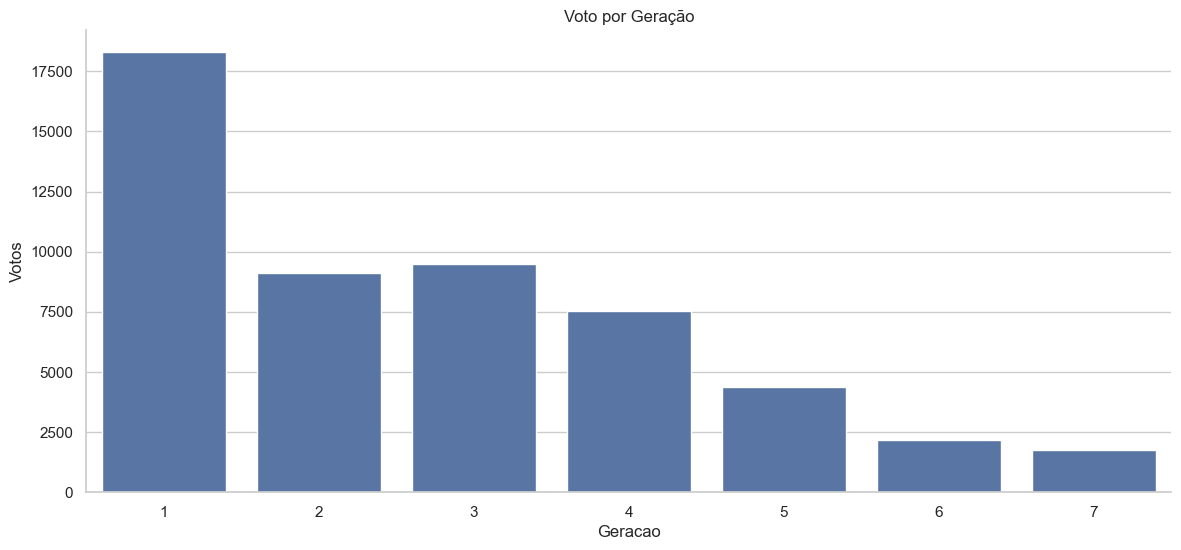

In [81]:
plt.figure(figsize=(14, 6)) # tamanho da figura
sns.set_palette('deep') # tipo de cor pro gráfico
sns.barplot(votos_geracao) # função pra criar o gráfico de barras
plt.axhline(color='gray', linestyle='--', linewidth=0.5) # adicionando as linhas pra melhor visualização
sns.despine() # removendo as linhas dos limites superior e à direita
plt.title("Voto por Geração") # titulo
plt.show() # mostrar gráfico.

É bem notório que a primeira geração foi a que teve mais votos. Tivemos um total de 18289 votos espalhados entre os pokémons da primeira geração, que é quase o dobro da terceira geração, a segunda com mais votos, com um total de 9469. A segunda e quarta gerações obtiveram entre 10000 e 7500 votos cada. Na quinta, tivemos uma queda para 4391 votos. Já a sexta e sétima gerações foram as menos votadas, acumulando menos de 2 mil votos em cada uma.

Além das gerações, também temos tipos diferentes de pokémon. Portanto, vamos analisar quantos votos receberam cada tipo.

In [85]:
favs['Tipo']

0      Grass Poison
1      Grass Poison
2      Grass Poison
3              Fire
4              Fire
           ...     
804      Rock Steel
805      Fire Ghost
806        Electric
807           Steel
808           Steel
Name: Tipo, Length: 809, dtype: object

Por fim, finalmente, vamos verificar quem são os Pokémons favoritos. Iremos pegar o top 10 mais votados.

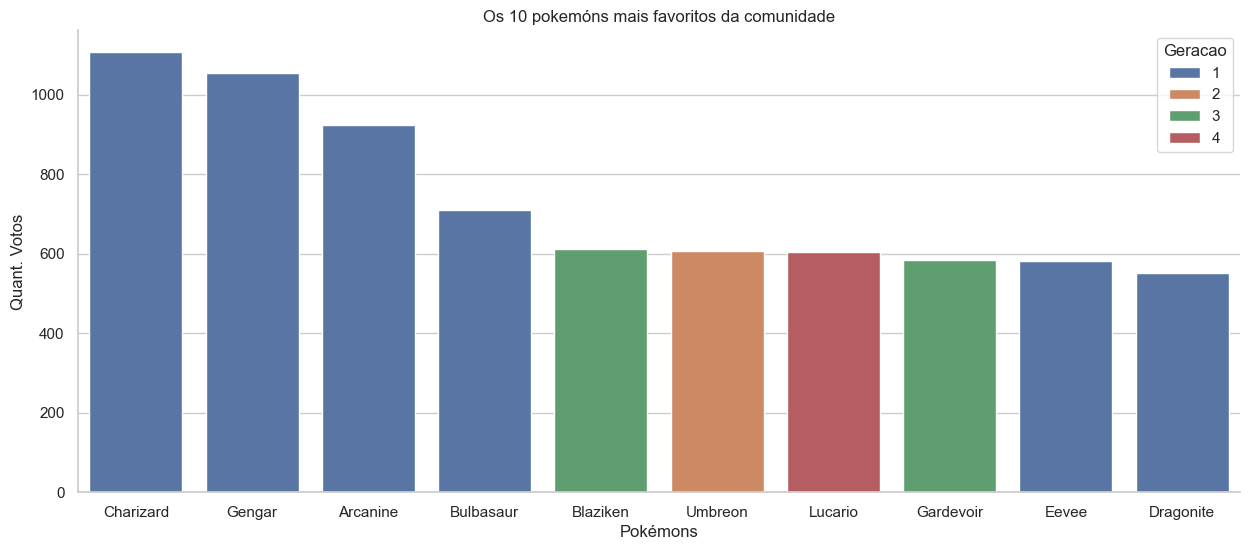

In [114]:
top10_pokemons = favs.sort_values(by='Votos', ascending=False) # Ordenando por votos em ordem decrescente e guardando em uma variável

plt.figure(figsize=(15,6)) # tamanho da figura
sns.barplot(data=top10_pokemons[:10], x='Pokemon', y='Votos', hue='Geracao', palette='deep') # função pra criar o gráfico
sns.despine() # apagando as linhas do limite superior e à direita
plt.title("Os 10 pokemóns mais favoritos da comunidade") # título
plt.xlabel('Pokémons') # nome pro eixo x
plt.ylabel('Quant. Votos') # nome pro eixo y
plt.show() # mostrar gráfico

Criamos uma variável para armazenar o nosso top 10 e a ordenamos decrescentemente com base nos votos de cada pokémon. Passamos ela como parâmetro, sendo o eixo x o nome do pokémon e o eixo y a quantidade de votos. Também aplicamos hue pra ver qual é a geração de cada um no top 10.

No nosso top 3 temos: em primeiro lugar _Charizard_, pokémon do tipo fogo e voador, com mais de 1107 votos. Em segundo temos _Gengar_, que é tipo fantasma e venenoso, com 1056 votos. Ambos foram os únicos que atingiram mais de mil votos da comunidade. _Arcanine_, também do tipo fogo, vem logo em seguida com 923 votos.

Do quarto ao décimo colocado temos, respectivamente: Bulbassauro, com 710 votos; Blaziken, com 613 votos; Umbreon, com 607 votos; Lucario, com 604 votos; Gardevoir com 585 votos; Eevee, com 581 votos; Dragonite, com 551 votos.

Algo interessante de se notar é que, dos dez, seis deles são da primeira geração, o que corrobora com o favoritismo dos primeiros jogos da franquia e, também, das primeiras animações.

E quem seriam os Pokémons menos favoritos da comunidade?

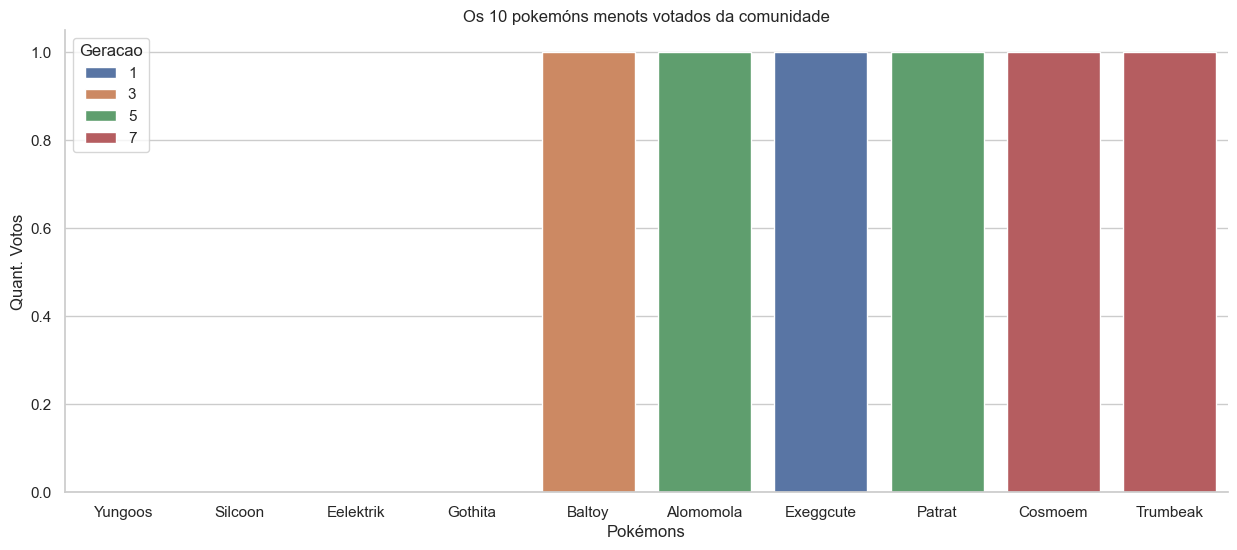

In [126]:
piores10_pokemons = favs.sort_values(by='Votos', ascending=True)

plt.figure(figsize=(15,6))
sns.barplot(data=piores10_pokemons[:10], x='Pokemon', y='Votos', hue='Geracao', palette='deep')
sns.despine()
plt.title("Os 10 pokemóns menots votados da comunidade")
plt.xlabel('Pokémons')
plt.ylabel('Quant. Votos')
plt.show()

Tivemos 4 pokémons que não receberam nenhum único voto, que foram eles: Yungoos, Silcoon, Eelektrik e Gothita. Vamos remover os pokémons que não receberam votos e ver como fica.

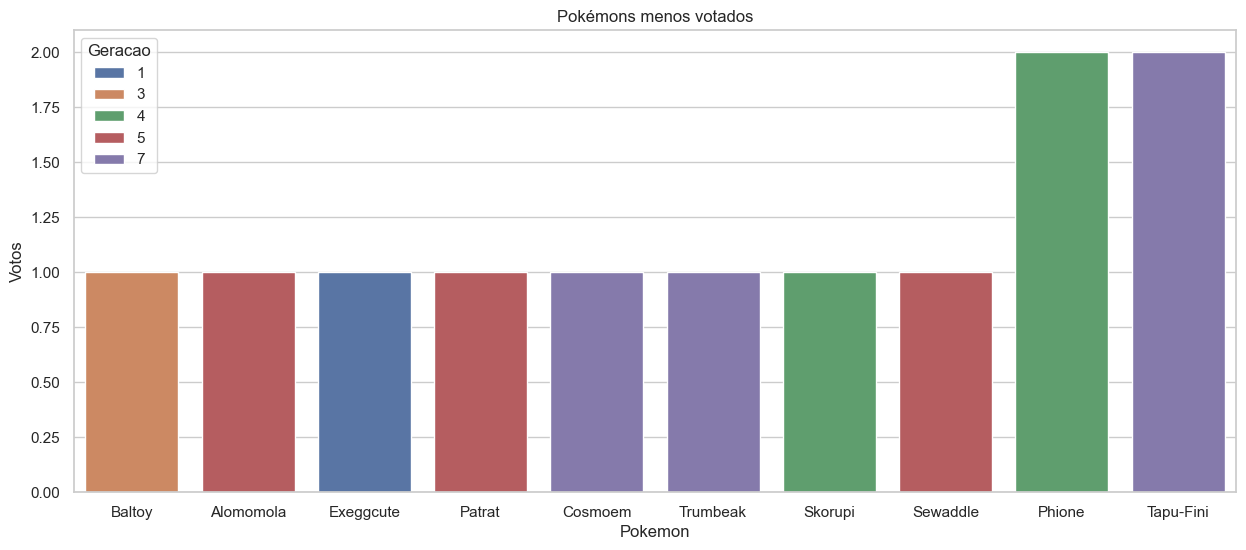

In [182]:
pot10_pokemons = piores10_pokemons[piores10_pokemons['Votos'] > 0] # excluindo os que não receberam nenhum voto

plt.figure(figsize=(15, 6)) # tamanho da figura
sns.barplot(data=pot10_pokemons[:10], x='Pokemon', y='Votos', hue='Geracao', palette='deep') # função pra criar o gráfico
plt.title('Pokémons menos votados') # título
plt.show() # mostrar gráfico

Excluindo os pokémons que não receberam nenhum voto, temos o nosso top 10 menos votados. 8 deles receberam apenas um único voto e os outros dois receberam exatos 2 votos. Além disso, podemos notar que estão presentes 3 pokémons da geração 7 e 3 da geração 5, o que bate com a quantidade de votos por geração vista anteriormente. 

## Conclusão